In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from hatespeech import HateSpeechClassifier

%matplotlib inline

In [2]:
csf = HateSpeechClassifier()
X, y = csf.build()
tweets = csf.df.tweet
feats_names = csf.feature_names

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f699f87a7f0>]],
      dtype=object)

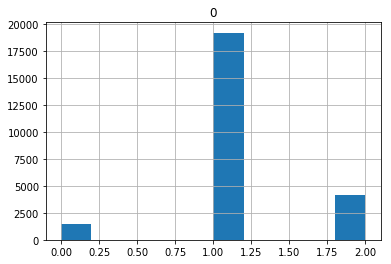

In [3]:
pd.DataFrame(y).hist()

In [4]:
X.shape, len(feats_names)

((24783, 11145), 11145)

In [5]:
data = pd.DataFrame(X, columns=feats_names)
data['class'] = y
data.describe()

ab          abil           abl           abo         abort  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.002918      0.002258      0.003240      0.007125      0.002961   
std        0.162368      0.145097      0.169970      0.239054      0.184221   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        9.038472      9.326154      8.920689      8.026871     18.344006   

               abov       absolut           abt           abu          abus  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.004180      0.008522      0.003600      0.002302      0.003870   
std        0.189924      0.258047      0.196267      0.170824      0.183675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.633007      7.822076     17.841377     19.016951      8.720018   

           ...          num_words  num_unique_words     vader neg  \
count      ...       24783.000000      24783.000000  24783.000000   
mean       ...          13.592947         12.913933      0.228975   
std        ...           6.885442          6.281764      0.205714   
min        ...           1.000000          1.000000      0.000000   
25%        ...           8.000000          8.000000      0.000000   
50%        ...          13.000000         12.000000      0.219000   
75%        ...          19.000000         18.000000      0.368000   
max        ...          36.000000         33.000000      1.000000   

          vader pos     vader neu  vader compound  num_hashtags  num_mentions  \
count  24783.000000  24783.000000    24783.000000  24783.000000  24783.000000   
mean       0.094317      0.676709       -0.259380      0.778961      0.778195   
std        0.129019      0.214635        0.480408      2.006578      0.875600   
min        0.000000      0.000000       -0.992400      0.000000      0.000000   
25%        0.000000      0.526000       -0.659700      0.000000      0.000000   
50%        0.000000      0.674000       -0.340000      0.000000      1.000000   
75%        0.171000      0.828000        0.000000      1.000000      1.000000   
max        0.859000      1.000000        0.983400     77.000000     10.000000   

           num_urls    is_retweet  
count  24783.000000  24783.000000  
mean       0.124117      0.064924  
std        0.341150      0.246396  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 11145 columns]

In [ ]:
# X = data.drop(['class'], axis=1)
# y = data['class']

In [6]:
def conf_matrix(matrix):
    matrix_proportions = np.zeros((3, 3))
    for i in range(0, 3):
        matrix_proportions[i, :] = matrix[i, :] / float(matrix[i, :].sum())
            
    return matrix_proportions


def run_tests(df_x, df_y):
    select_model = SelectFromModel(
        LogisticRegression(class_weight='balanced', penalty='l1', C=0.01)
    )
    LR = LogisticRegression(class_weight='balanced', penalty='l2')
    pipeline = Pipeline(steps=[
        ('select', select_model),
        ('model', LR)
    ])
    param_grid = [{}]
    
    for n in range(10):
        xtrain, xtest, ytrain, ytest = train_test_split(
            df_x, df_y, test_size=0.1
        )
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=StratifiedKFold(n_splits=5, random_state=42).split(xtrain, ytrain),
            n_jobs=10
        )
        model = grid_search.fit(xtrain, ytrain)
        ypreds = model.predict(xtest)

        cm = confusion_matrix(ytest, ypreds)
        r = conf_matrix(cm)
        print(r[0][0], r[1][1], r[2][2])

### With KNeighborsClassifier

In [7]:
data.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
0  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
1  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
2  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
3  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
4  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

   num_words  num_unique_words  vader neg  vader pos  vader neu  \
0       25.0              23.0      0.000      0.120      0.880   
1       16.0              16.0      0.237      0.000      0.763   
2       20.0              18.0      0.538      0.000      0.462   
3        8.0               8.0      0.000      0.344      0.656   
4       26.0              23.0      0.109      0.229      0.662   

   vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
0          0.4563           0.0           1.0       0.0         0.0  
1         -0.6876           0.0           1.0       0.0         0.0  
2         -0.9550           0.0           2.0       0.0         1.0  
3          0.5673           0.0           2.0       0.0         0.0  
4          0.6331           1.0           1.0       0.0         0.0  

[5 rows x 11145 columns]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30, n_jobs=10, metric='cosine')
neigh.fit(X, y)

neighbors_dists, neighbors_inds = neigh.kneighbors(return_distance=True)

In [9]:
# distancias
pd.DataFrame(neighbors_dists).head()

0         1         2         3         4         5         6   \
0  0.007976  0.008160  0.008254  0.008323  0.008441  0.008450  0.008489   
1  0.015510  0.016132  0.016165  0.016183  0.016289  0.016295  0.016405   
2  0.010415  0.010441  0.010706  0.010723  0.010836  0.010847  0.010874   
3  0.011637  0.011736  0.012614  0.012627  0.013021  0.013025  0.013075   
4  0.009073  0.009254  0.009279  0.009295  0.009334  0.009338  0.009373   

         7         8         9     ...           20        21        22  \
0  0.008494  0.008525  0.008563    ...     0.009057  0.009063  0.009069   
1  0.016406  0.016548  0.016660    ...     0.017041  0.017057  0.017169   
2  0.011019  0.011208  0.011289    ...     0.011986  0.012064  0.012130   
3  0.013183  0.013285  0.013299    ...     0.013910  0.014148  0.014186   
4  0.009426  0.009636  0.009682    ...     0.010197  0.010308  0.010318   

         23        24        25        26        27        28        29  
0  0.009104  0.009163  0.009177  0.009190  0.009216  0.009218  0.009220  
1  0.017174  0.017400  0.017426  0.017434  0.017475  0.017523  0.017534  
2  0.012146  0.012170  0.012174  0.012227  0.012235  0.012320  0.012324  
3  0.014198  0.014214  0.014218  0.014260  0.014311  0.014328  0.014346  
4  0.010363  0.010391  0.010393  0.010425  0.010435  0.010494  0.010513  

[5 rows x 30 columns]

In [10]:
# features com os vizinhos

size = len(neighbors_dists)
meta_names = [
    'min_dist_0', 'min_dist_1', 'min_dist_2', 
    'max_dist_0', 'max_dist_1', 'max_dist_2', 
    'mean_dist_0', 'mean_dist_1','mean_dist_2', 
    'quantile_inf_0', 'quantile_inf_1', 'quantile_inf_2', 
    'quantile_sup_0', 'quantile_sup_1', 'quantile_sup_2',
    'count_neighbors_0', 'count_neighbors_1', 'count_neighbors_2',
    'count_max_neighbors_0', 'count_max_neighbors_1', 'count_max_neighbors_2'
]
df_meta_features = pd.DataFrame(np.zeros((size, len(meta_names))), columns=meta_names)

for i, (dist, ind) in enumerate(zip(neighbors_dists, neighbors_inds)):
    df_neighbors = data.loc[ind]
    
    df_dist = pd.DataFrame(dist, index=ind)
    
    df_neighbors_0 = df_neighbors[df_neighbors['class']==0]
    df_neighbors_1 = df_neighbors[df_neighbors['class']==1]
    df_neighbors_2 = df_neighbors[df_neighbors['class']==2]
    
    ind_0 = df_neighbors_0.index.values.tolist()
    ind_1 = df_neighbors_1.index.values.tolist()
    ind_2 = df_neighbors_2.index.values.tolist()
    
    values0 = df_dist.loc[ind_0].values
    values1 = df_dist.loc[ind_1].values
    values2 = df_dist.loc[ind_2].values
    
    if not df_neighbors_0.empty:
        df_meta_features.loc[i, 'min_dist_0'] = np.min(values0)
        df_meta_features.loc[i, 'max_dist_0'] = np.max(values0)
        df_meta_features.loc[i, 'mean_dist_0'] = np.mean(values0)
        
        quantile0 = np.quantile(values0, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_0'] = quantile0[0]
        df_meta_features.loc[i, 'quantile_sup_0'] = quantile0[1]
        
        df_meta_features.loc[i, 'count_neighbors_0'] = len(values0)
        
        max_dist0 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_0'] = len(values0) / max_dist0
        
    if not df_neighbors_1.empty:
        df_meta_features.loc[i, 'min_dist_1'] = np.min(values1)
        df_meta_features.loc[i, 'max_dist_1'] = np.max(values1)
        df_meta_features.loc[i, 'mean_dist_1'] = np.mean(values1)
        
        quantile1 = np.quantile(values1, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_1'] = quantile1[0]
        df_meta_features.loc[i, 'quantile_sup_1'] = quantile1[1]
        
        df_meta_features.loc[i, 'count_neighbors_1'] = len(values1)
        
        max_dist1 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_1'] = len(values1) / max_dist1
        
    if not df_neighbors_2.empty:
        df_meta_features.loc[i, 'min_dist_2'] = np.min(values2)
        df_meta_features.loc[i, 'max_dist_2'] = np.max(values2)
        df_meta_features.loc[i, 'mean_dist_2'] = np.mean(values2)
        
        quantile2 = np.quantile(values2, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_2'] = quantile2[0]
        df_meta_features.loc[i, 'quantile_sup_2'] = quantile2[1]
        
        df_meta_features.loc[i, 'count_neighbors_2'] = len(values2)
        
        max_dist2 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_2'] = len(values2) / max_dist2


df_meta_features.head()

min_dist_0  min_dist_1  min_dist_2  max_dist_0  max_dist_1  max_dist_2  \
0    0.008254    0.008160    0.007976    0.009057    0.009220    0.009190   
1    0.017169    0.015510    0.016183    0.017426    0.017534    0.017174   
2    0.012064    0.010415    0.011289    0.012235    0.012320    0.012324   
3    0.013620    0.011637    0.012614    0.013620    0.014328    0.014346   
4    0.009334    0.009073    0.009295    0.010182    0.010494    0.010513   

   mean_dist_0  mean_dist_1  mean_dist_2  quantile_inf_0  \
0     0.008768     0.008837     0.008712        0.008624   
1     0.017298     0.016816     0.016597        0.017233   
2     0.012149     0.011452     0.011586        0.012107   
3     0.013620     0.013514     0.013480        0.013620   
4     0.009618     0.009902     0.010147        0.009336   

           ...            quantile_inf_2  quantile_sup_0  quantile_sup_1  \
0          ...                  0.008490        0.009025        0.009104   
1          ...                  0.016267        0.017362        0.017045   
2          ...                  0.011377        0.012192        0.012058   
3          ...                  0.013047        0.013620        0.014167   
4          ...                  0.010040        0.009760        0.010224   

   quantile_sup_2  count_neighbors_0  count_neighbors_1  count_neighbors_2  \
0        0.009042                3.0               17.0               10.0   
1        0.016844                2.0               24.0                4.0   
2        0.011537                2.0               23.0                5.0   
3        0.013913                1.0               27.0                2.0   
4        0.010413                3.0               20.0                7.0   

   count_max_neighbors_0  count_max_neighbors_1  count_max_neighbors_2  
0               0.176471                    1.0               0.588235  
1               0.083333                    1.0               0.166667  
2               0.086957                    1.0               0.217391  
3               0.037037                    1.0               0.074074  
4               0.150000                    1.0               0.350000  

[5 rows x 21 columns]

In [11]:
df_meta_features

min_dist_0  min_dist_1  min_dist_2  max_dist_0  max_dist_1  max_dist_2  \
0        0.008254    0.008160    0.007976    0.009057    0.009220    0.009190   
1        0.017169    0.015510    0.016183    0.017426    0.017534    0.017174   
2        0.012064    0.010415    0.011289    0.012235    0.012320    0.012324   
3        0.013620    0.011637    0.012614    0.013620    0.014328    0.014346   
4        0.009334    0.009073    0.009295    0.010182    0.010494    0.010513   
5        0.007948    0.007185    0.008007    0.008245    0.008651    0.008680   
6        0.014548    0.012999    0.013951    0.015453    0.015452    0.014714   
7        0.012653    0.012725    0.012686    0.012653    0.014457    0.014265   
8        0.000000    0.014057    0.017137    0.000000    0.017237    0.017137   
9        0.025817    0.020476    0.022518    0.025817    0.025879    0.025974   
10       0.014030    0.012671    0.011666    0.014122    0.014210    0.013714   
11       0.000000    0.012503    0.018035    0.000000    0.018907    0.018782   
12       0.000000    0.008403    0.000000    0.000000    0.012585    0.000000   
13       0.000000    0.000910    0.000000    0.000000    0.021606    0.000000   
14       0.003740    0.002692    0.004024    0.003740    0.004547    0.004553   
15       0.005732    0.005116    0.006591    0.005732    0.007580    0.007450   
16       0.010637    0.009497    0.010356    0.011403    0.011678    0.011573   
17       0.003705    0.003448    0.004489    0.003705    0.004987    0.004919   
18       0.000000    0.012264    0.014577    0.000000    0.014991    0.014577   
19       0.000000    0.006266    0.009289    0.000000    0.009899    0.009896   
20       0.000000    0.014123    0.015655    0.000000    0.016759    0.016341   
21       0.000000    0.000455    0.008824    0.000000    0.009955    0.009585   
22       0.000000    0.009011    0.010361    0.000000    0.011197    0.010846   
23       0.012250    0.012013    0.012575    0.013928    0.013986    0.013671   
24       0.000000    0.012007    0.013241    0.000000    0.014726    0.014693   
25       0.000000    0.010608    0.000000    0.000000    0.013369    0.000000   
26       0.000000    0.006125    0.007926    0.000000    0.008504    0.007926   
27       0.013948    0.011667    0.015085    0.014949    0.015149    0.015085   
28       0.000000    0.004778    0.000000    0.000000    0.008183    0.000000   
29       0.000000    0.013313    0.015397    0.000000    0.015708    0.015701   
...           ...         ...         ...         ...         ...         ...   
24753    0.000000    0.006924    0.008687    0.000000    0.009440    0.009342   
24754    0.010681    0.008937    0.000000    0.010681    0.011779    0.000000   
24755    0.000000    0.009472    0.011567    0.000000    0.012053    0.012016   
24756    0.012405    0.010774    0.011298    0.012405    0.013051    0.013044   
24757    0.013949    0.012414    0.011591    0.013949    0.014465    0.014198   
24758    0.000000    0.015418    0.016821    0.000000    0.017472    0.017193   
24759    0.007652    0.007254    0.008418    0.007652    0.008829    0.008774   
24760    0.009259    0.008303    0.009582    0.009259    0.010054    0.009985   
24761    0.008618    0.008434    0.009017    0.008618    0.010160    0.009958   
24762    0.022165    0.001325    0.020673    0.022165    0.022801    0.022570   
24763    0.000000    0.011978    0.011910    0.000000    0.013796    0.013639   
24764    0.013436    0.010247    0.013662    0.013436    0.014540    0.014520   
24765    0.004952    0.003546    0.004227    0.005405    0.004945    0.004884   
24766    0.007122    0.005341    0.006791    0.007122    0.008053    0.007987   
24767    0.021506    0.020254    0.014660    0.021705    0.022101    0.022103   
24768    0.000000    0.014089    0.016015    0.000000    0.017195    0.017183   
24769    0.015108    0.013469    0.016586    0.016313    0.017156    0.016847   
24770    0.012755    0.010341    0.011

In [12]:
new_data = pd.concat([data, df_meta_features], axis=1)
new_data.shape, data.shape

((24783, 11166), (24783, 11145))

In [13]:
new_X = new_data.drop(['class'], axis=1)
run_tests(new_X, y)

0.5714285714285714 0.889747552807831 0.9271356783919598
0.6410256410256411 0.9122438255386233 0.9285714285714286
0.5816993464052288 0.8953309389430477 0.9496021220159151
0.5735294117647058 0.9084249084249084 0.9560185185185185
0.5801526717557252 0.8996881496881497 0.9599056603773585
0.5174418604651163 0.8958333333333334 0.9328165374677002
0.5524475524475524 0.9050829875518672 0.9583333333333334
0.5661764705882353 0.9042887029288703 0.962877030162413
0.49264705882352944 0.8990160538581046 0.9441747572815534
0.5866666666666667 0.8896443514644351 0.9544364508393285


In [14]:
old_X = data.drop(['class'], axis=1)
run_tests(old_X, y)

0.5563380281690141 0.9055526725480021 0.9365853658536586
0.6013986013986014 0.8991596638655462 0.9513888888888888
0.539568345323741 0.9042443064182195 0.946078431372549
0.5570469798657718 0.9003670686942842 0.9385342789598109
0.5238095238095238 0.9140504374678332 0.9203084832904884
0.5616438356164384 0.8993253762324858 0.9532019704433498
0.5637583892617449 0.8988529718456726 0.9490291262135923
0.5748031496062992 0.9079497907949791 0.9431818181818182
0.6115702479338843 0.9029622063329928 0.96
0.5822784810126582 0.9089958158995816 0.960880195599022
